# DML Exercises

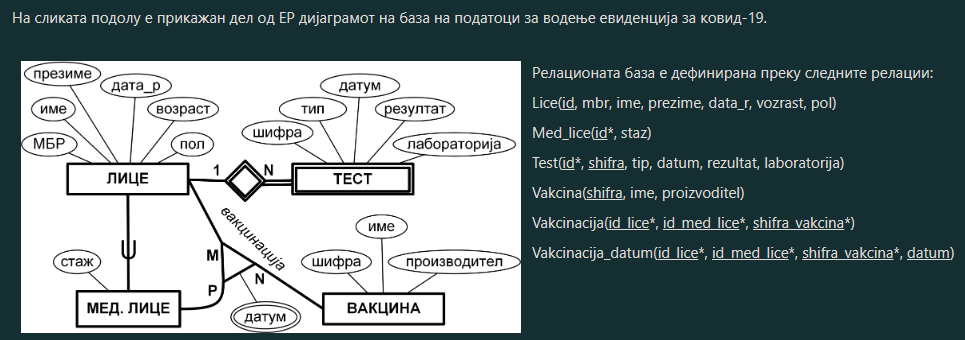

**1. Да се напише DML израз со кој ќе се вратат матичните броеви на лицата (сортирани во растечки редослед) кои биле позитивни и потоа примиле барем една доза вакцина.**

In [ ]:
with
Vakcina_edna as
(
    select distinct id_lice, datum
    from Vakcinacija_datum
)

select distinct Lice.id
from Lice join Test on Lice.id = Test.id join Vakcina_edna on Lice.id = Vakcina_edna.id_lice
where Test.rezultat = 'pozitiven' and Vakcina_edna.datum > Test.datum
order by Lice.id

**7. Да се напише DML израз со кој ќе се врати информација за тоа колкав процент од лицата кои имале позитивен тест во август 2021 не биле целосно вакцинирани (вакцинирани со две дози вакцина).** 

**<span style="color: var(--vscode-foreground);">З</span><span style="color: var(--vscode-foreground);">абелешка: Форматот на датум е 'YYYY-MM-DD'.</span>**

In [ ]:
with
Pozitivni as
(
    select Lice.id
    from Lice join Test on Lice.id = Test.id
    where Test.rezultat = 'pozitiven' and Test.datum like '2021-08%'
),
Vakcini as
(
    select Pozitivni.id, COUNT(Vakcinacija_datum.id_lice) as dozi
    from Pozitivni left join Vakcinacija_datum on Pozitivni.id = Vakcinacija_datum.id_lice
    group by Vakcinacija_datum.id_lice
),
Procent as
(
    select 100.0 * COUNT(case when Vakcini.dozi < 2 then 1 else null end) / COUNT(*) as procent
    from Vakcini
)

select * from Procent

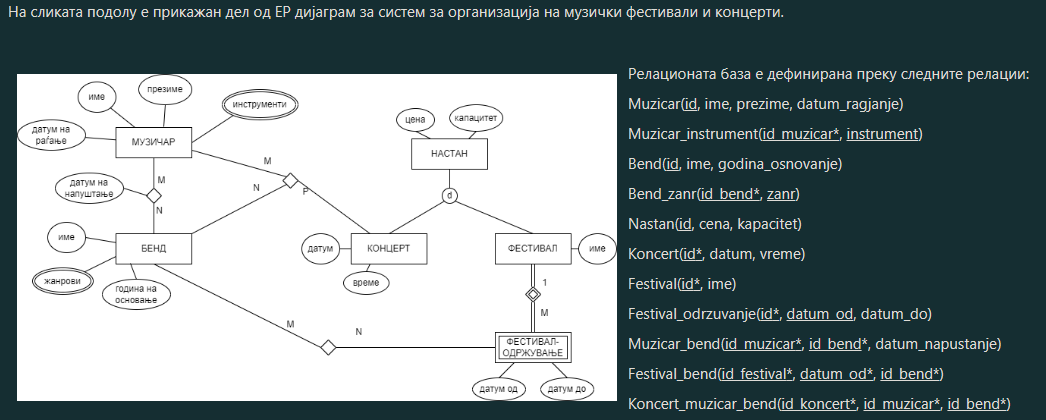

**2. Да се напише DML израз со кој ќе се вратат имињата и презимињата на гитаристите (музичарите кои свират на инструментот гитара) кои настапиле на концерт заедно со бенд откако го напуштиле. Датумот на настап на музичарот заедно со бендот е датумот на самиот концерт. Резултатите треба да се подредени според името во растечки редослед.**

In [ ]:
with 
Gitaristi as
(
    select Muzicar.id, Muzicar.ime, Muzicar.prezime
    from Muzicar join Muzicar_instrument on Muzicar.id = Muzicar_instrument.id_muzicar 
    where Muzicar_instrument.instrument = 'gitara'
),
Gitaristi_bend as
(
    select Gitaristi.id, Gitaristi.ime, Gitaristi.prezime, Muzicar_bend.id_bend, Muzicar_bend.datum_napustanje
    from Gitaristi join Muzicar_bend on Gitaristi.id = Muzicar_bend.id_muzicar
    where Muzicar_bend.datum_napustanje != ''
),
Nastapi as
(
    select Gitaristi_bend.ime, Gitaristi_bend.prezime
    from Gitaristi_bend join Koncert_muzicar_bend on Gitaristi_bend.id = Koncert_muzicar_bend.id_muzicar and Gitaristi_bend.id_bend = Koncert_muzicar_bend.id_bend join Koncert on Koncert_muzicar_bend.id_koncert = Koncert.id
    where Gitaristi_bend.datum_napustanje < Koncert.datum
)

select * 
from Nastapi
order by Nastapi.ime

**8. Да се напише DML израз со кој ќе се вратат сите парови на бендови (пар од имињата на бендовите) кои се основани во иста година.**

In [ ]:
with
Bendovi as
(
    select bend1.ime as B1, bend2.ime as B2
    from Bend bend1 join Bend bend2 on bend1.godina_osnovanje = bend2.godina_osnovanje 
    where bend1.ime > bend2.ime
    order by bend1.ime, bend2.ime desc
)

select *
from Bendovi

**13. Да се напише DML израз со кој за секој фестивал ќе се врати името, цената на билетите, капацитетот на посетители, бројот на одржувања и вкупниот број на различни бендови кои настапиле.**

In [ ]:
with
Festivali as
(
    select Festival.id, Festival.ime, Nastan.cena, Nastan.kapacitet, COUNT(Festival_odrzuvanje.datum_od) as broj_odrzuvanja  
    from Festival join Nastan on Festival.id = Nastan.id join Festival_odrzuvanje on Festival.id = Festival_odrzuvanje.id 
    group by Festival_odrzuvanje.id
),
Bendovi as
(
    select Festivali.ime, Festivali.cena, Festivali.kapacitet, Festivali.broj_odrzuvanja, COUNT(distinct Festival_bend.id_bend) as broj_bendovi
    from Festivali join Festival_bend on Festivali.id = Festival_bend.id_festival
    group by Festival_bend.id_festival
)

select * from Bendovi

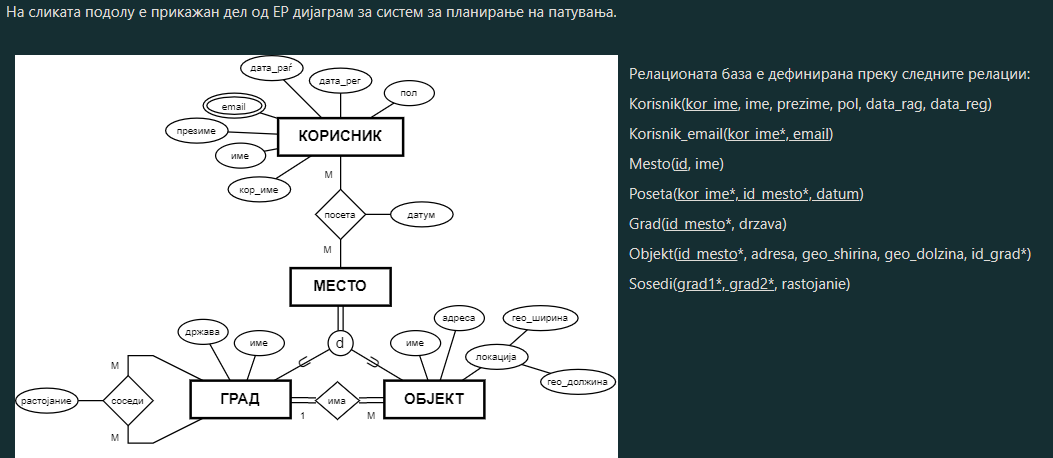

**3. Да се напише DML израз со кој ќе се вратат името и презимето на корисниците кои во ист ден посетиле објекти кои се наоѓаат во соседни градови.**

In [ ]:
with 
Gradovi as 
(
    select Mesto.id, Mesto.ime as grad
    from Mesto join Grad on Mesto.id = Grad.id_mesto
),
Objekti as 
(
    select Mesto.id, Mesto.ime, Gradovi.grad as grad
    from Mesto join Objekt on Mesto.id = Objekt.id_mesto join Gradovi on Objekt.id_grad  = Gradovi.id
),
Sosedni as
(
    select grad1.grad as grad1, grad2.grad as grad2
    from Sosedi join Gradovi grad1 on Sosedi.grad1 = grad1.id join Gradovi grad2 on Sosedi.grad2 = grad2.id
),
Korisnik_poseti as
(
    select Korisnik.ime, Korisnik.prezime, Objekti.ime as objekt, Objekti.grad, Poseta.datum
    from Korisnik join Poseta on Korisnik.kor_ime = Poseta.kor_ime join Objekti on Poseta.id_mesto = Objekti.id
),
Korisnici_ist_den as
(
    select distinct poseta1.ime, poseta1.prezime
    from Korisnik_poseti poseta1 join Korisnik_poseti poseta2 on poseta1.ime = poseta2.ime and poseta1.prezime = poseta2.prezime and poseta1.datum = poseta2.datum join Sosedni on (poseta1.grad = Sosedni.grad1 and poseta2.grad = Sosedni.grad2) or (poseta2.grad = Sosedni.grad1 and poseta1.grad = Sosedni.grad2)
    where poseta1.grad != poseta2.grad
)

select * 
from Korisnici_ist_den

**4. Да се напише DML израз со кој ќе се вратат името и презимето на корисниците кои посетиле објекти кои се наоѓаат во соседни градови чие растојание е помало од 300 km.**

In [ ]:
with 
Gradovi as 
(
    select Mesto.id, Mesto.ime as grad
    from Mesto join Grad on Mesto.id = Grad.id_mesto
),
Objekti as 
(
    select Mesto.id, Mesto.ime, Gradovi.grad
    from Mesto join Objekt on Mesto.id = Objekt.id_mesto join Gradovi on Objekt.id_grad  = Gradovi.id
),
Sosedni as
(
    select grad1.grad as grad1, grad2.grad as grad2, Sosedi.rastojanie
    from Sosedi join Gradovi grad1 on Sosedi.grad1 = grad1.id join Gradovi grad2 on Sosedi.grad2 = grad2.id
),
Korisnik_poseti as
(
    select Korisnik.ime, Korisnik.prezime, Objekti.ime as objekt, Objekti.grad
    from Korisnik join Poseta on Korisnik.kor_ime = Poseta.kor_ime join Objekti on Poseta.id_mesto = Objekti.id
),
Korisnici_ist_den as
(
    select distinct poseta1.ime, poseta1.prezime
    from Korisnik_poseti poseta1 join Korisnik_poseti poseta2 on poseta1.ime = poseta2.ime and poseta1.prezime = poseta2.prezime join Sosedni on (poseta1.grad = Sosedni.grad1 and poseta2.grad = Sosedni.grad2) or (poseta2.grad = Sosedni.grad1 and poseta1.grad = Sosedni.grad2)
    where poseta1.grad != poseta2.grad and Sosedni.rastojanie < 300
)

select * from Korisnici_ist_den

**9. Да се напише DML израз со кој ќе се врати името на градот во кој се наоѓа објектот што бил посетен најголем број пати.**

In [ ]:
with 
Gradovi as 
(
    select Mesto.id, Mesto.ime as grad
    from Mesto join Grad on Mesto.id = Grad.id_mesto
),
Objekti as 
(
    select Mesto.id, Mesto.ime, Gradovi.grad
    from Mesto join Objekt on Mesto.id = Objekt.id_mesto join Gradovi on Objekt.id_grad  = Gradovi.id
),
Poseti as 
(
    select Poseta.id_mesto, Objekti.grad, COUNT(Poseta.id_mesto) as broj
    from Poseta join Objekti on Poseta.id_mesto = Objekti.id 
    group by Poseta.id_mesto
),
Max_poseti as
(
    select Poseti.grad as ime
    from Poseti 
    where Poseti.broj = (select MAX(Poseti.broj) from Poseti)
)

select * from Max_poseti

**10. Да се напише DML израз со кој ќе се вртат имињата на објектите кои се наоѓаат во градот што бил посетен најголем број пати. За посети на градови се сметаат посетите на места што претставуваат градови. Во ова не се вклучени посетите на објекти во тие градови.**

In [ ]:
with 
Gradovi as 
(
    select Mesto.id, Mesto.ime as grad
    from Mesto join Grad on Mesto.id = Grad.id_mesto
),
Objekti as 
(
    select Mesto.id, Mesto.ime, Gradovi.grad
    from Mesto join Objekt on Mesto.id = Objekt.id_mesto join Gradovi on Objekt.id_grad  = Gradovi.id
),
Poseti as
(
    select Gradovi.grad, COUNT(Poseta.id_mesto) as broj
    from Poseta join Gradovi on Poseta.id_mesto = Gradovi.id 
    group by Poseta.id_mesto
),
Max_poseti as
(
    select Poseti.grad as ime
    from Poseti 
    where Poseti.broj = (select MAX(Poseti.broj) from Poseti)
)
select * from Max_poseti

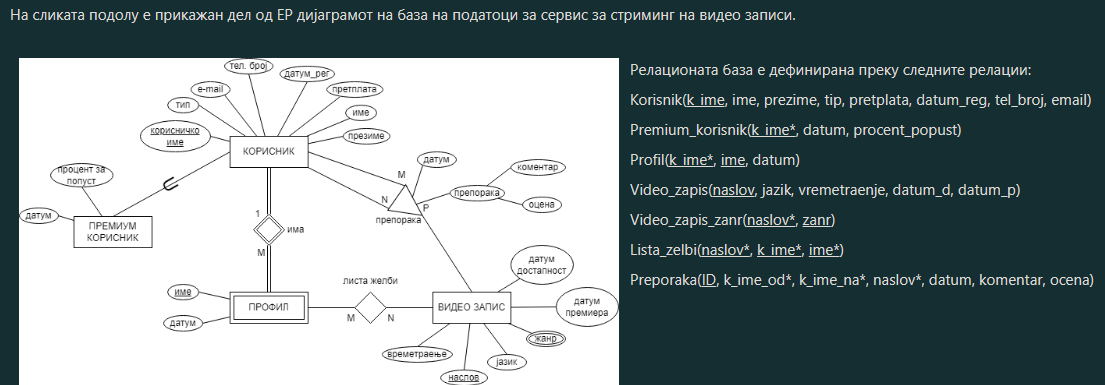

**5\. / 21. Да се напише DML израз со кој ќе се вратат имињата и презимињата на сите премиум корисници кои препорачале видео запис со времетраење подолго од 2 часа и за кој оставиле оцена поголема или еднаква на 4, подредени според датумот на регистрација во растечки редослед.** 

**\*времетраењето се чува во минути**

In [ ]:
with
Premium as
(
    select Korisnik.k_ime, Korisnik.ime, Korisnik.prezime, Korisnik.datum_reg
    from Korisnik join Premium_korisnik on Korisnik.k_ime = Premium_korisnik.k_ime 
),
Preporaki as
(
    select distinct Premium.ime, Premium.prezime
    from Premium join Preporaka on Premium.k_ime = Preporaka.k_ime_od join Video_zapis on Preporaka.naslov = Video_zapis.naslov 
    where Video_zapis.vremetraenje > 120 and Preporaka.ocena >= 4
    order by Premium.datum_reg
)

select *
from Preporaki

**11\. / 22. Да се напише DML израз со кој ќе се вратат корисничкото име и бројот на видео записи кои му биле препорачани на корисникот кој дал најголем број на препораки.** 

**Напомена: при оценување на оваа задача нема да се признаваат решенија со користење на ORDER BY.**

In [ ]:
with
Preporaki as
(
    select Korisnik.k_ime, COUNT(Preporaka.k_ime_od) as broj
    from Korisnik join Preporaka on Korisnik.k_ime = Preporaka.k_ime_od
    group by Preporaka.k_ime_od
),
Max_preporaki as
(
    select Preporaki.k_ime
    from Preporaki
    where Preporaki.broj = (select MAX(Preporaki.broj) from Preporaki)
),
Preporachani as
(
    select Max_preporaki.k_ime, COUNT(Preporaka.k_ime_na) as dobieni_preporaki
    from Max_preporaki join Preporaka on Max_preporaki.k_ime = Preporaka.k_ime_na
    group by Preporaka.k_ime_na
)

select * from Preporachani

**14\. / 23. Да се напише DML израз со кој за секој профил ќе се врати името на профилот и просечната оцена на видео записите во листата на желби асоцирана со тој профил.**

**(Просечната оцена на секој видео запис се пресметува од сите оцени за тој видео запис).**

In [ ]:
with
Profili as
(
    select Profil.k_ime, Profil.ime, Lista_zelbi.naslov
    from Profil join Lista_zelbi on Profil.ime = Lista_zelbi.ime
),
Oceni as
(
    select Preporaka.naslov, AVG(Preporaka.ocena) as ocena
    from Preporaka 
    group by Preporaka.naslov
),
Prosek as
(
    select Profili.ime, AVG(Oceni.ocena) as po_profil
    from Profili join Lista_zelbi on Profili.ime = Lista_zelbi.ime join Oceni on Lista_zelbi.naslov = Oceni.naslov
    group by Profili.ime
)

select * from Prosek

**24. Да се вратат жанровите заедно со бројот на препораки со коментар што го содржи зборот „interesting“, подредени според бројот на препораки во опаѓачки ред.**

In [ ]:
with
Zanrovi as
(
    select Video_zapis_zanr.naslov, Video_zapis_zanr.zanr, Preporaka.komentar
    from Video_zapis_zanr join Preporaka on Video_zapis_zanr.naslov = Preporaka.naslov
    where Preporaka.komentar like '%interesting%'
),
Broj as
(
    select Zanrovi.zanr, COUNT(Zanrovi.komentar) as broj_zanrovi
    from Zanrovi
    group by Zanrovi.zanr
)

select * from Broj

**25. Да се врати список со насловите на видеата, времетраењето и бројот на препораки, за видеа кои се во листата на желби на најмалку два различни профили.**

In [ ]:
with
Zelbi as
(
    select Lista_zelbi.ime, Video_zapis.naslov, Video_zapis.vremetraenje
    from Video_zapis join Lista_zelbi on Video_zapis.naslov = Lista_zelbi.naslov left join Preporaka on Video_zapis.naslov = Preporaka.naslov
    group by Lista_zelbi.ime, Video_zapis.naslov
),
Lista as
(
    select Zelbi.naslov, Zelbi.vremetraenje, COUNT(*) as broj
    from Zelbi
    group by Zelbi.naslov
),
Preporaki as
(
    select Lista.naslov, Lista.vremetraenje, COUNT(Preporaka.k_ime_od) as broj_preporaki
    from Lista left join Preporaka on Lista.naslov = Preporaka.naslov
    where Lista.broj > 1
    group by Lista.naslov
)

select * from Preporaki

**26. Да се вратат имињата на сите корисници кои имаат дадено препораки за видеа кои никој од нивните профили не ги има во листата на желби.**

In [ ]:
with
Profili_zelbi as
(
    select distinct Korisnik.k_ime, Lista_zelbi.naslov
    from Korisnik join Lista_zelbi on Korisnik.k_ime = Lista_zelbi.k_ime 
),
Iminja as
(
    select distinct Preporaka.k_ime_od
    from Preporaka
    where (Preporaka.k_ime_od, Preporaka.naslov) 
    not in
    (select * from Profili_zelbi)
)

select * from Iminja

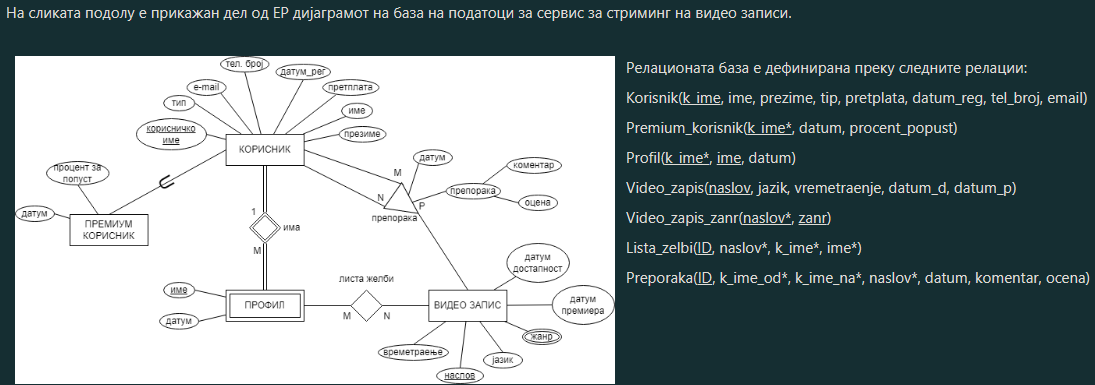

**6. Да се напише DML израз со кој ќе се вратат корисничките имиња и насловите на препорачаните видео записи за сите премиум корисници кои добиле препорака со оцена поголема од 3 за барем еден видео запис во 2021 година кој е дел од листата на желби во барем еден од нивните профили, подредени според корисничкото име.**

In [ ]:
with
Premium as
(
    select Korisnik.k_ime, Korisnik.ime, Korisnik.prezime
    from Korisnik join Premium_korisnik on Korisnik.k_ime = Premium_korisnik.k_ime 
),
Premium_preporaki as
(
    select Premium.k_ime, Preporaka.naslov
    from Premium join Preporaka on Premium.k_ime = Preporaka.k_ime_na
    where Preporaka.ocena > 3 and Preporaka.datum like '2021%'
),
Lista as
(
    select Premium_preporaki.k_ime, Premium_preporaki.naslov, COUNT(Lista_zelbi.naslov) as broj
    from Premium_preporaki left join Lista_zelbi on Premium_preporaki.k_ime = Lista_zelbi.k_ime and Premium_preporaki.naslov = Lista_zelbi.naslov
    group by Premium_preporaki.naslov
),
Korisnici_zelba as
(
    select Lista.k_ime, Lista.naslov
    from Lista 
    group by Lista.k_ime, Lista.naslov
    having SUM(Lista.broj) > 0
)

select *
from Korisnici_zelba

**12. Да се напише DML израз со кој за секој корисник ќе се врати видео записот кој го препорачал најголем број пати.**

In [ ]:
with
Preporaki as
(
    select Korisnik.k_ime, Preporaka.naslov, COUNT(Preporaka.naslov) as broj
    from Korisnik join Preporaka on Korisnik.k_ime = Preporaka.k_ime_od
    group by Preporaka.k_ime_od, Preporaka.naslov
),
Max_preporaki as
(
    select Preporaki.k_ime, Preporaki.naslov, Preporaki.broj
    from Preporaki 
    where Preporaki.broj = (select MAX(broj) from Preporaki as sub where sub.k_ime = Preporaki.k_ime)
)

select * from Max_preporaki

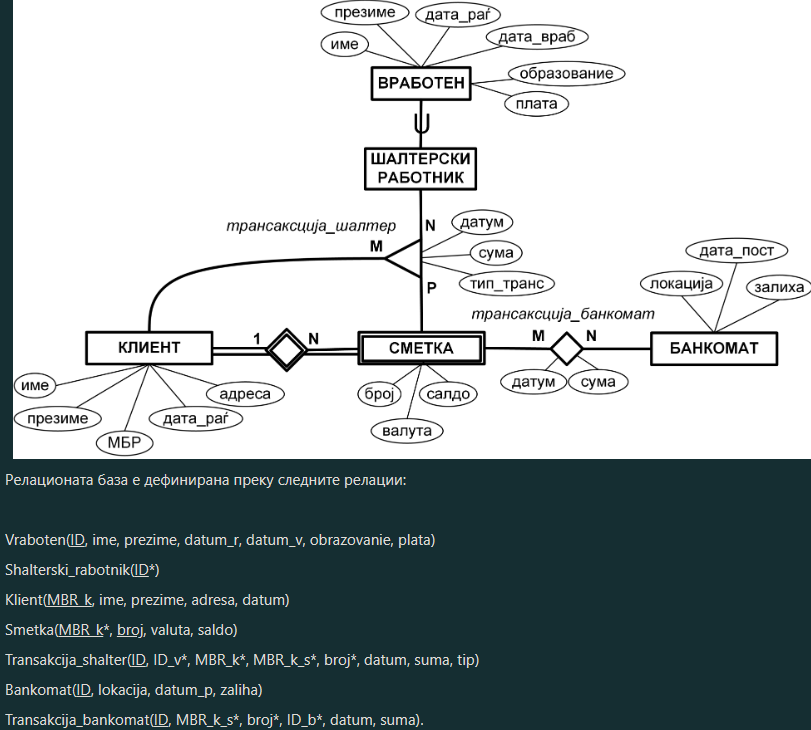

**15. Да се напише DML израз со кој ќе се вратат имињата и презимињата на сите шалтерски работници кои имаат направено трансакција за исплата на средства во износ поголем од 1000 EUR од сметка која работи со валута EUR, подредени според името на шалтерските работници.**

In [ ]:
select distinct ime, prezime 
from Vraboten join Shalterski_rabotnik on Vraboten.ID = Shalterski_rabotnik.ID join Transakcija_shalter ON Vraboten.ID = Transakcija_shalter.ID_v join Smetka on Transakcija_shalter.broj = Smetka.broj 
where tip = 'isplata' and valuta = 'EUR' and suma > 1000
order by ime

**16\. Да се напише DML израз со кој ќе се вратат имињата и презимињата на на сите клиенти кои имаат направено трансакција за исплата на средства преку банкомат во износ поголем од 400 USD од сметка која работи со валута USD, подредени според името на клиентите.**

In [ ]:
select distinct ime, prezime 
from Klient 
join Smetka on Klient.MBR_k = Smetka.MBR_k 
join Transakcija_bankomat on Smetka.broj = Transakcija_bankomat.broj 
where valuta = 'USD' and suma > 400 
order by ime

**17. Да се напише DML израз со кој ќе се вратат сите сметки кои работат со валута MKD од кои е направена барем една трансакција за исплата преку шалтер и барем една трансакција за исплата преку банкомат во 2021 година, подредени според бројот на сметка.**

In [ ]:
select Smetka.MBR_k, Smetka.broj, Smetka.valuta, Smetka.saldo
from Smetka 
join Transakcija_shalter on Smetka.broj = Transakcija_shalter.broj 
where Smetka.broj in (
    select Smetka.broj
    from Smetka 
    join Transakcija_shalter on Smetka.broj = Transakcija_shalter.broj
    where valuta = 'MKD' and datum like '2021%' and tip = 'isplata'
    intersect
    select Smetka.broj
    from Smetka 
    join Transakcija_bankomat on Smetka.broj = Transakcija_bankomat.broj
    where valuta = 'MKD' and datum like '2021%'
)
order by Smetka.broj

**18. Да се напише DML израз со кој ќе се вратат сите клиенти кои направиле барем една трансакција преку банкомат (за сметки кои работат со валута EUR), но не направиле ниту една трансакција преку шалтер од истата сметка, подредени според името на клиентот.**

In [ ]:
select Klient.MBR_k, Klient.ime, Klient.prezime, Klient.adresa, Klient.datum
from Klient 
join Smetka on Klient.MBR_k = Smetka.MBR_k 
where Smetka.broj in (
    select distinct Smetka.broj
    from Smetka
    where valuta = 'EUR'
    except
    select distinct Smetka.broj
    from Smetka 
    join Transakcija_shalter on Smetka.broj = Transakcija_shalter.broj
    where valuta = 'EUR'
    intersect
    select distinct Smetka.broj
    from Smetka 
    join Transakcija_bankomat on Smetka.broj = Transakcija_bankomat.broj
    where valuta = 'EUR'
)
order by Klient.ime

**19. Да се напише DML израз со кој за секој шалтерски работник ќе се врати неговата шифра, датумот и бројот на трансакции за датумот на кој има направено најголем број на трансакции.** 

**Забелешка: Форматот на датум е 'YYYY-MM-DD'.** 

**Забелешка: Доколку користите common table expression (CTE) не е потребно да се стави ; по изразот, а ; е потребно по креирање на поглед или помошна табела.**

In [ ]:
with 
Result as (
    select id_v, datum, count(*) as broj_transakcii
    from Transakcija_shalter
    group by id_v, datum
)
select Vraboten.id as vraboten, Result.datum, Result.broj_transakcii 
from Result 
join Vraboten on Result.id_v = Vraboten.id
where Result.broj_transakcii = (
    select max(Result.broj_transakcii) 
    from Result 
    where Result.id_v = Vraboten.id
)

**20. Да се напише DML израз со кој за секоја сметка која работи со валута EUR или USD да се вратат просечната направена сума oд трансакции за исплата преку шалтер во 2021 година и просечната направена сума од трансакции за исплата преку банкомат во 2021 година, подредени според бројот на сметка.**

In [ ]:
with 
Shalter_trans as (
    select *
    from Transakcija_shalter
    where Transakcija_shalter.tip = 'isplata' and Transakcija_shalter.datum like '2021%' 
),
Bankomat_trans as (
    select *
    from Transakcija_bankomat
    where Transakcija_bankomat.datum like '2021%'
),
Smetka_Valuta as (
    select *
    from Smetka
    where Smetka.valuta in ('EUR', 'USD')
)

select distinct Smetka_Valuta.MBR_k, Smetka_Valuta.broj, cast(avg(Bankomat_trans.suma) as decimal(10, 2)) as prosechna_isplata_bankomat, cast(avg(Shalter_trans.suma) as decimal(10, 2)) as prosechna_isplata_shalter 
from Bankomat_trans 
join Smetka_Valuta on Bankomat_trans.broj = Smetka_Valuta.broj 
join Shalter_trans on Shalter_trans.broj = Smetka_Valuta.broj
group by Smetka_Valuta.broj